### Training and running a linear model using Scikit-Learn

In [15]:
import sklearn.neighbors

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

#Load the data
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('datasets/lifesat/gdp_per_capita.csv', thousands=',',delimiter='\t',
                            encoding='latin1',na_values='n/a')

In [2]:
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [3]:
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
#prepare the Data
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

In [7]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

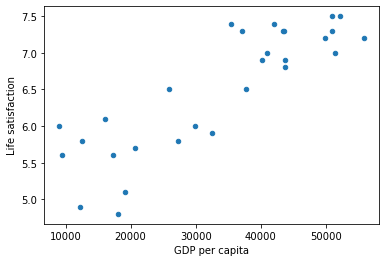

In [10]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [11]:
#Select a Linear Model
model = sklearn.linear_model.LinearRegression()

#Fit the model
model.fit(X,y)


LinearRegression()

In [12]:
X_new = [[22587]]   #Cyprus GDP per capita
print(model.predict(X_new))

[[5.96242338]]


In [18]:
#Trying K-Nearest Neighbours
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)


#Fit the model
model1.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [19]:
print(model1.predict(X_new))

[[5.76666667]]


### Q and A

1. How could you define machine Learning?

Machine learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.

2. Can you name four types of problems where it shines?

Machine Learning is great for complex problems for which we have no algorithmic solution to replace long lists of hand-tuned rules, to build systems that adapt to fluctuation environments and finally to help humans learn(e.g., Data mining)

3. What is a labeled training set?

A labeled training set is a training set that contains the desired solution(a.k.a a label) for each instance.

4. What are the two most common supervised tasks?

The two most common supervised tasks are regression and classsification

5. Can you name four common unsupervised tasks?

Clustering, visualization, dimensionality reduction and association rule learning

6. What type of machine learning algorithm would you use to allow a robot to walk in various unknown terrains?

Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains since this is typically the type of problem that Reinforcement learning tackles. It might be possible to express the problem as a supervised or semisupervised learning problem, but it would be less natural.

7. What type of algorithm would you use to segment your customers into multiple groups?

If you dont know how to define the groups, then you can use a clustering algorithm (unsupervised Learning) to segment your customers into clusters of similar customers. However, If you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm, and it will classify all your customers into these groups.

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

Spam detection is a typical supervised learning problem. the algorithm is fed many emails along with labels(spam or not)

9. What is an online learning system?

Can learn incrementally, as opposed to batch learning system. this makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.

10. What is out of core learning?

out of core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out of core learning algorithm chops the data into mini batches and uses online learning techniques to learn from these mini batches

11. What type of learning algorithm relies on a similarity measure to make predictions?

An instance based learning system learns the training data by heart, then when given a new instance, it uses a similarity measure to find the most similar learned instaces and uses them to make predictions.

12. What is the difference between a model parameter and a learning algorithm's hyperparameter?

A model has one or more parameters that determine what it will predict given a new instance (e.g slope of a linear model). A learning algorithm try to find the optimal values for these paremeters such that the model generalizes to the new instances well. A hyperparameter is the parameter of the learning algorithm itself, not of the model(e.g the amount of regularization to apply)

13. What do Model based learning algorithms search for ? What is the most common strategy they use to succeed? How do the make predictions? 

Model-based learning search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing the cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. to make predictions we feed the new instance's features into the model prediction function using the parameter values found by the learning algorithm.

14. Can you name four of the main challenges in Machine Learning?

Lack of data, poor quality of data, non representative data, uninformative measures, excessively simple models that underfit the training data and excessively complex models that overfits the training data

15.If your model performs great on the training data but generalizes poorly to new instances, what is happening? can you name three possible solutions? 

The model is likely to overfit the training data(or we got extremely lucky on the training data). Getting more data, simplifying the model(selecting a simpler algorithm, reducing the number of parameters or features used or regularizing the model) or reducing the noise in the data

16. What is a test set and why would you want to use it?

A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production

17. What is the purpose of a validation set?

A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.

18. What can go wrong if you tune hyperparemeters using the test set? 

If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic(you may launch model that performs worse than you expect)

19. What is cross validation and why would you prefer it to a validation set?

technique to compare models(for model selection and hyperparameter tuning) without the need for a seperate validation set. This saves precious training data.